In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew





In [2]:
pd.set_option('display.max_rows', 300)

In [3]:
file = 'data /train_2.csv'
train=pd.read_csv(file)
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.drop(['Unnamed: 0'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
file = 'data /test_2.csv'
test=pd.read_csv(file)
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.drop(['Unnamed: 0'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Lets take a look at the distribution of the variable that we want to predict 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


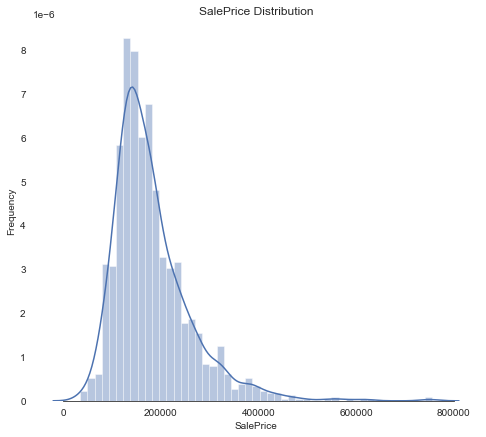

In [7]:


sns.set_style("white")
sns.set_color_codes(palette='deep')
f,ax = plt.subplots(figsize=(8,7))

sns.distplot(train['SalePrice'], color ='b')
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
sns.despine(trim=True, left=True)
plt.show()



In [8]:


# Skewness and Kurtosis

print("Skewness : %f" % train['SalePrice'].skew() )
print("Kurtosis : %f" % train['SalePrice'].kurt())



Skewness : 1.882876
Kurtosis : 6.536282





The skewness value is ~ 1, that means that the data are moderately skewed, and we high Kurtosis indicates that the data has heavy tails/ outliers, so we need to investigate further 


In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Log Tranformation 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


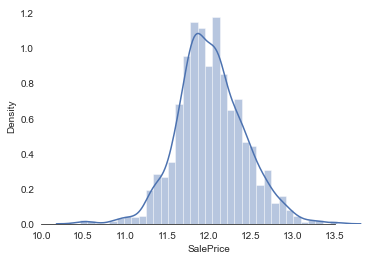

In [10]:
#We will use the numpy fuction log1p which  applies log(1+x) to all elements of the column

train['SalePrice'] = np.log1p(train['SalePrice'])


# Check the Skewness

sns.distplot(train['SalePrice'], color = 'b')
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()


In [11]:
# we fixed the skewness 

In [12]:
train['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

# Exploring relationships

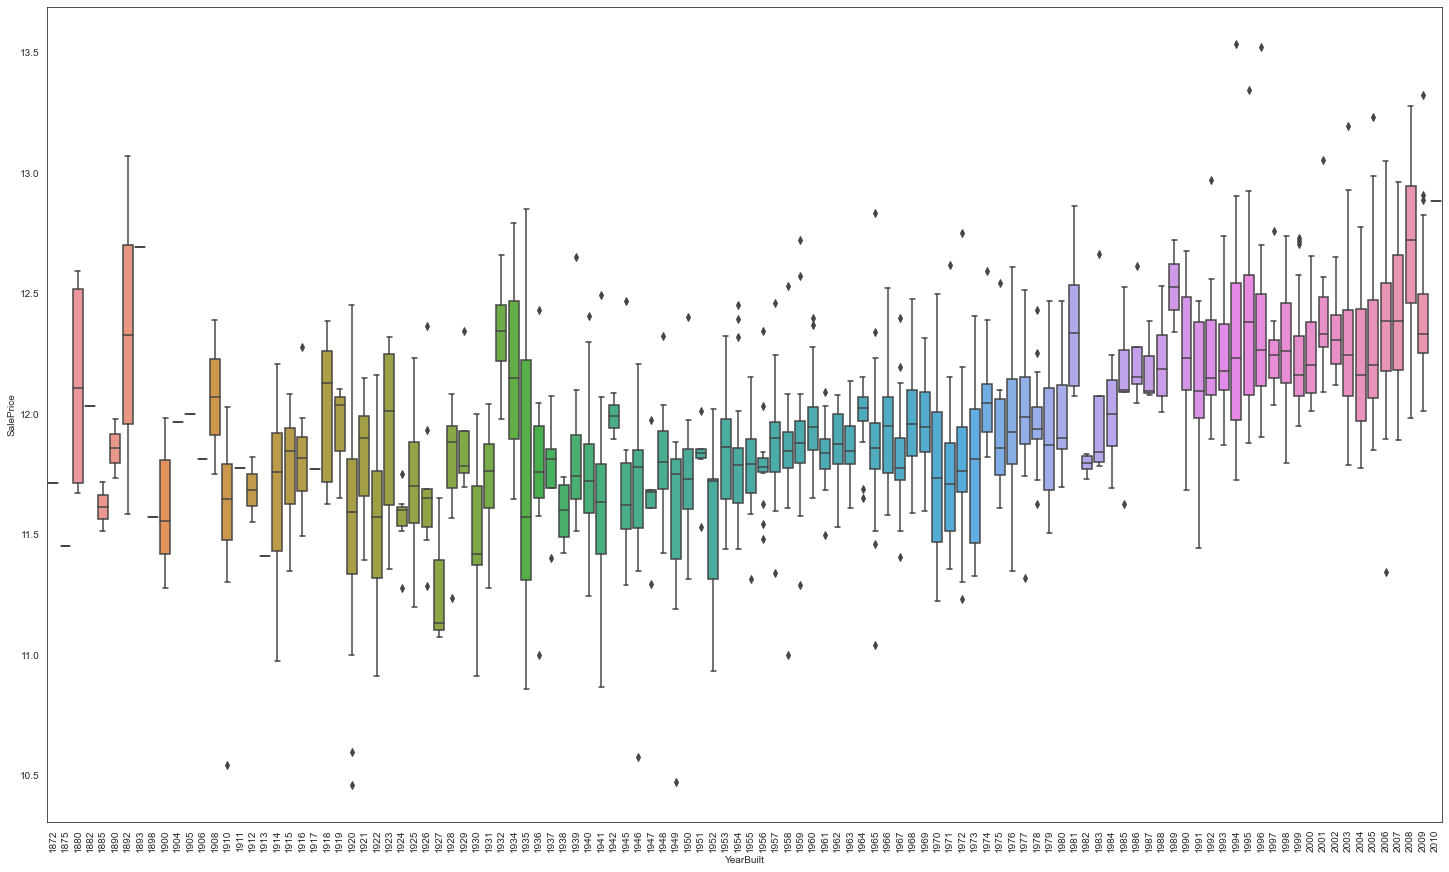

In [13]:


plt.figure(figsize=(25,15))
ax.set_xlabel('YearBuilt')
ax.set_ylabel('SalePrice')
plt.xticks(rotation=90)
sns.boxplot(x= train.YearBuilt, y= train.SalePrice)
plt.savefig("Yearbuilt_saleprice.png")



While there have been outliers show, we can see that the housing prices haven't necessary gone up too much in price considering how wide the spectrum is for housing prices in this community. 

# Communities by saleprice 


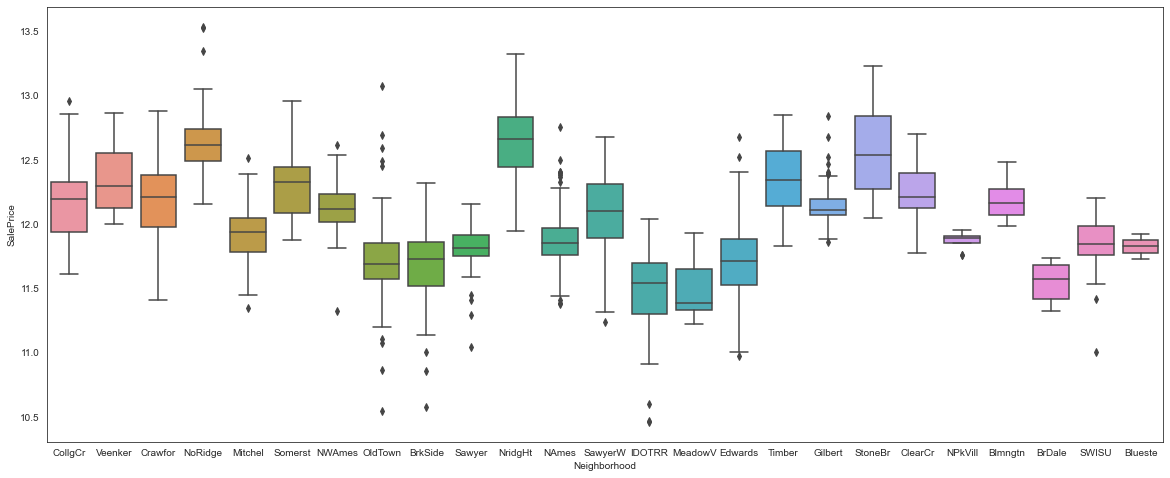

In [15]:
figure, ax = plt.subplots(figsize = (20,8))
sns.boxplot(data=train, x = 'Neighborhood', y='SalePrice')
plt.savefig("Neighborhood_saleprice.png")
plt.show()


In [16]:
train.groupby('Neighborhood').describe()

Unnamed: 0                                                \
                  count        mean         std    min     25%    50%   
Neighborhood                                                            
Blmngtn            17.0  772.941176  370.871688  219.0  465.00  790.0   
Blueste             2.0  777.500000  252.437121  599.0  688.25  777.5   
BrDale             16.0  718.187500  443.481412  225.0  331.00  577.5   
BrkSide            58.0  733.724138  435.850884    9.0  404.00  695.0   
ClearCr            28.0  603.928571  382.491339   69.0  277.00  522.5   
CollgCr           150.0  725.840000  445.513942    0.0  302.25  754.0   
Crawfor            51.0  800.078431  432.064247    3.0  450.50  860.0   
Edwards           100.0  761.930000  413.290620   39.0  406.25  731.0   
Gilbert            79.0  748.151899  426.017488   50.0  363.00  794.0   
IDOTRR             37.0  596.540541  430.578396   21.0  268.00  557.0   
MeadowV            17.0  732.000000  426.120142   23.0  434.00  649.0   
Mitchel            49.0  758.102041  429.507918    5.0  420.00  783.0   
NAmes             225.0  736.995556  431.303283   14.0  366.00  760.0   
NPkVill             9.0  780.444444  490.184432  126.0  504.00  675.0   
NWAmes             73.0  821.452055  413.706520    7.0  487.00  859.0   
NoRidge            41.0  814.268293  411.208890    4.0  517.00  759.0   
NridgHt            77.0  608.714286  401.319038   11.0  320.00  552.0   
OldTown           113.0  693.194690  435.761891    8.0  304.00  637.0   
SWISU              25.0  840.240000  363.138091  267.0  565.00  840.0   
Sawyer             74.0  714.851351  387.737932   10.0  465.25  750.0   
SawyerW            59.0  664.152542  407.841281   18.0  282.00  742.0   
Somerst            86.0  754.744186  418.889096    6.0  401.50  763.5   
StoneBr            25.0  668.520000  345.687253   58.0  470.00  688.0   
Timber             38.0  786.026316  413.047245   41.0  471.50  798.5   
Veenker            11.0  617.909091  459.322208    1.0  243.00  672.0   

                                  Id              ...   YrSold          \
                  75%     max  count        mean  ...      75%     max   
Neighborhood                                      ...                    
Blmngtn       1019.00  1415.0   17.0  773.941176  ...  2009.00  2010.0   
Blueste        866.75   956.0    2.0  778.500000  ...  2008.75  2009.0   
BrDale        1132.75  1378.0   16.0  719.187500  ...  2009.00  2010.0   
BrkSide       1138.00  1443.0   58.0  734.724138  ...  2009.00  2010.0   
ClearCr        833.00  1287.0   28.0  604.928571  ...  2009.00  2010.0   
CollgCr       1078.75  1447.0  150.0  726.840000  ...  2009.00  2010.0   
Crawfor       1176.00  1457.0   51.0  801.078431  ...  2008.00  2010.0   
Edwards       1122.25  1459.0  100.0  762.930000  ...  2009.00  2010.0   
Gilbert       1120.00  1455.0   79.0  749.151899  ...  2009.00  2010.0   
IDOTRR         916.00  1385.0   37.0  597.540541  ...  2009.00  2010.0   
MeadowV       1039.00  1449.0   17.0  733.000000  ...  2009.00  2010.0   
Mitchel       1138.00  1453.0   49.0  759.102041  ...  2009.00  2010.0   
NAmes         1103.00  1458.0  225.0  737.995556  ...  2009.00  2010.0   
NPkVill       1160.00  1431.0    9.0  781.444444  ...  2009.00  2010.0   
NWAmes        1159.00  1456.0   73.0  822.452055  ...  2009.00  2010.0   
NoRidge       1182.00  1426.0   41.0  815.268293  ...  2009.00  2010.0   
NridgHt        926.00  1437.0   77.0  609.714286  ...  2009.00  2010.0   
OldTown       1076.00  1438.0  113.0  694.194690  ...  2009.00  2010.0   
SWISU         1100.00  1399.0   25.0  841.240000  ...  2009.00  2010.0   
Sawyer        1002.25  1445.0   74.0  715.851351  ...  2009.00  2010.0   
SawyerW        943.50  1413.0   59.0  665.152542  ...  2009.00  2010.0   
Somerst       1090.50  1454.0   86.0  755.744186  ...  2009.00  2010.0   
StoneBr        769.00  1361.0   25.0  669.520000  ...  2009.00  2010.0   
Timber        1144.00  1396.0   38.0  787.02

NAmes,CollgCr,OldTown,Edwards have the highest amount of houses. 

# Variable Correlation 

In [17]:
## Getting the correlation of all the features with target variable. 
(train.corr('pearson'))['SalePrice'].sort_values(ascending = False)[1:].head()

OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
Name: SalePrice, dtype: float64

So far, the highest correlated features with regards to SalePrice, are:

OverallQual  
GrLivArea     
GarageCars     
GarageArea     
TotalBsmtSF 

# Heatmap 

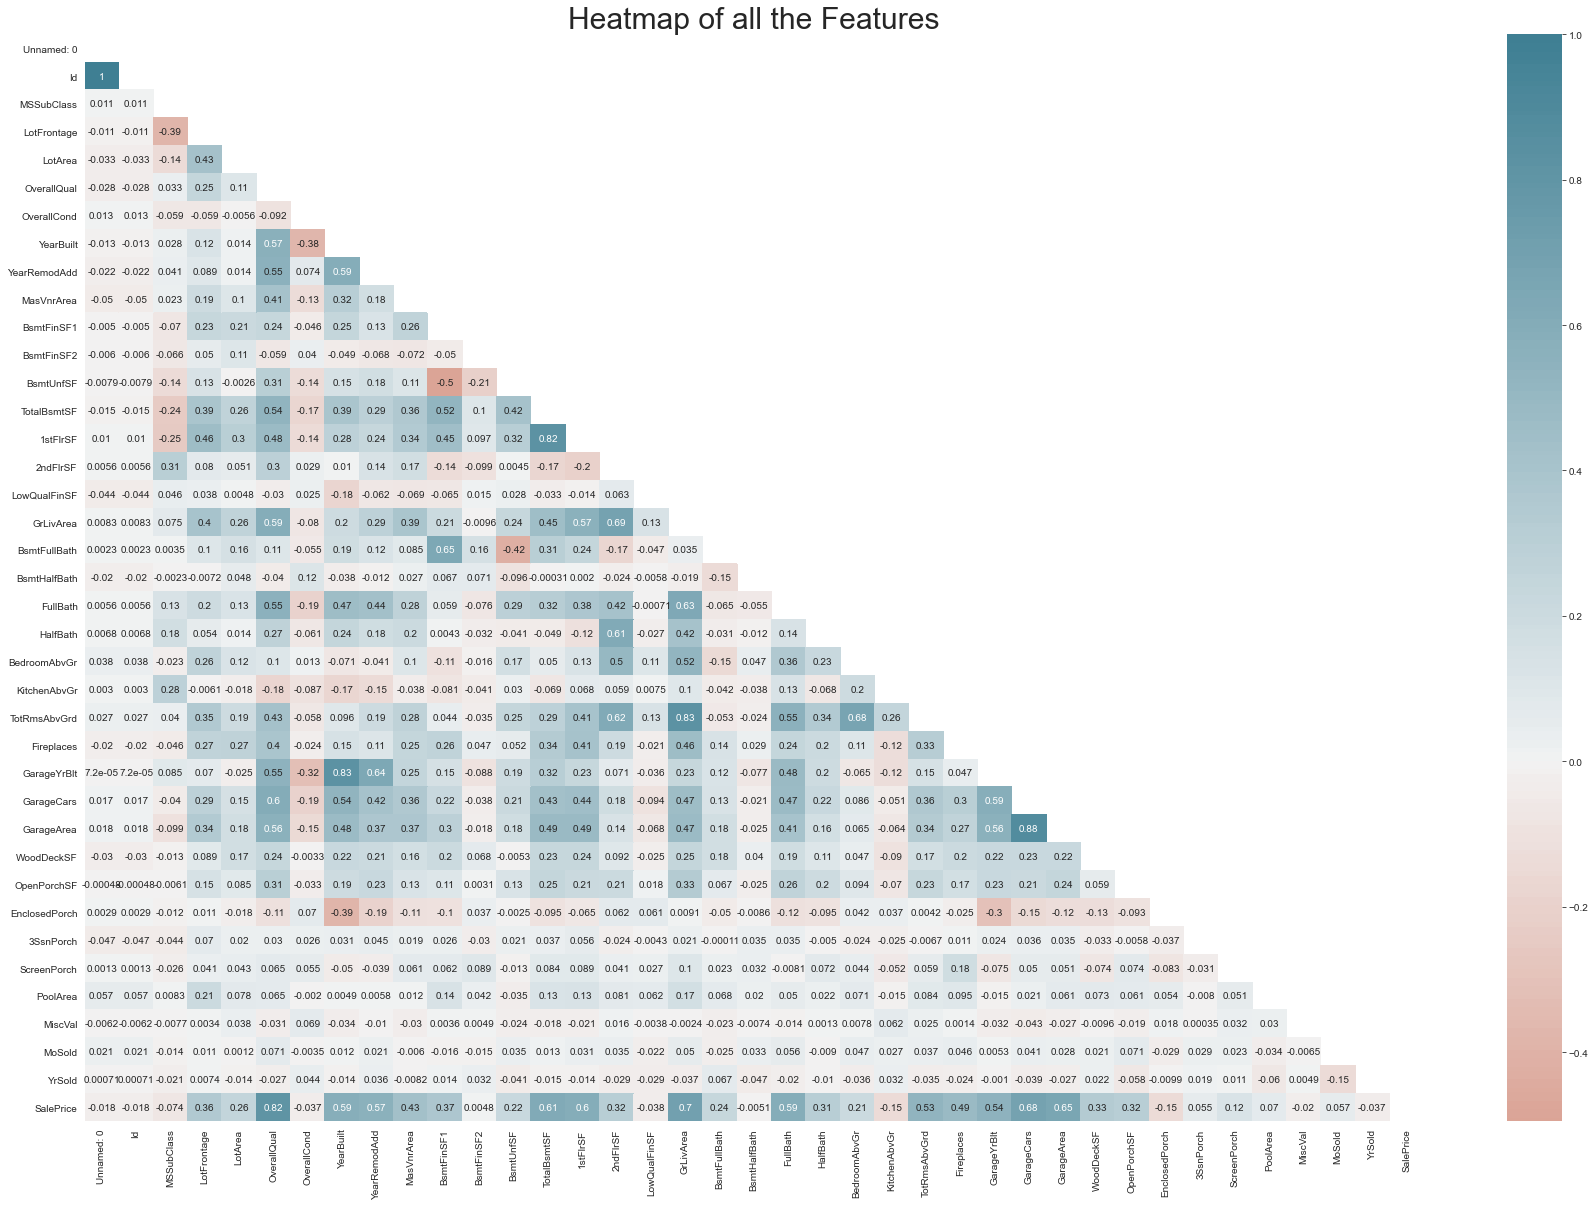

In [18]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);
plt.savefig("Heatmap.png")

 We can see there is a correlation of:

    82% between the 1stflr and TotalbsmtSF
    83% between YearBuilt and GaragaeYrBlt
    88% between GarageCars and GarageArea

  


# SalesPrice vs OverallQuall 

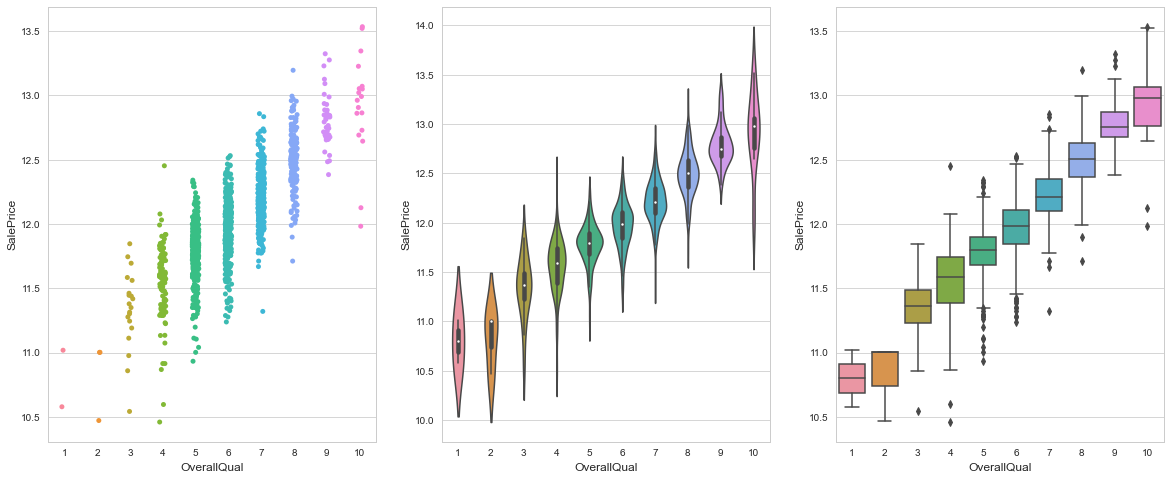

In [19]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.savefig("SalesPrice_OverallQuall.png")
plt.show()

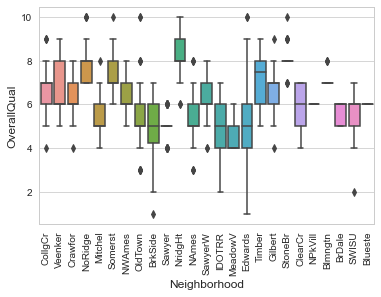

In [20]:
sns.boxplot(data=train, x = 'Neighborhood', y='OverallQual')
plt.xticks(rotation=90)
plt.show()

The relationship between SalesPrice and OverallQual is positive. The price of the houses increases with the overall quality. 

# SalesPrice vs GarageArea

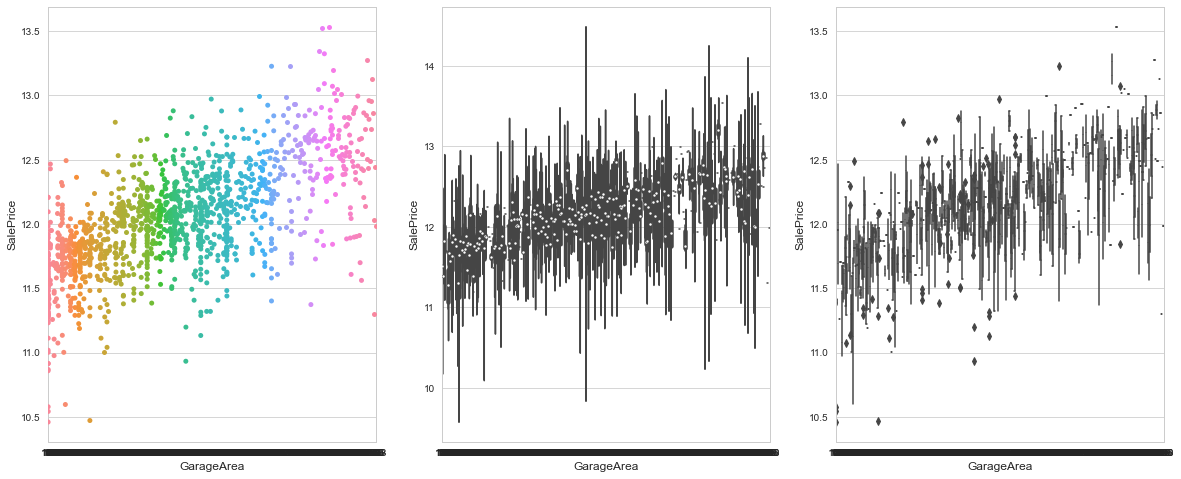

In [21]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train, x = 'GarageArea', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'GarageArea', y='SalePrice', ax = ax[1])
sns.boxplot(data=train, x = 'GarageArea', y='SalePrice', ax = ax[2])
plt.savefig("Salesprice_garagearea.png")
plt.show()

# SalesPrice vs GarageCars

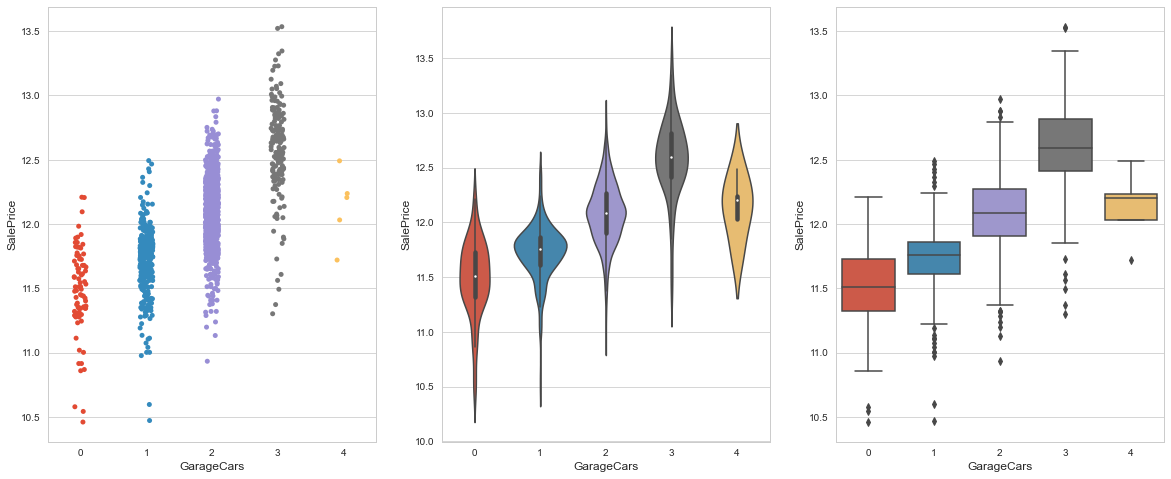

In [22]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train, x = 'GarageCars', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'GarageCars', y='SalePrice', ax = ax[1])
sns.boxplot(data=train, x = 'GarageCars', y='SalePrice', ax = ax[2])
plt.savefig("SalePrice_GarageCars.png")
plt.show()

# SalePrice vs TotalBsmtSF

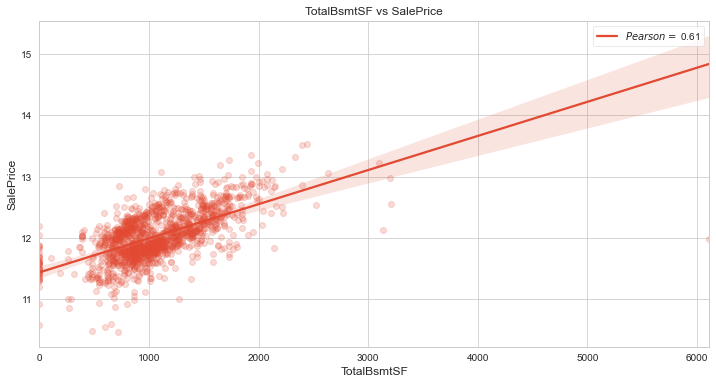

In [23]:
Pearson_TBSF = 0.61
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.savefig("SalePrice_TotalBsmtSF.png")
plt.show()


# Sales Price vs GrLivArea

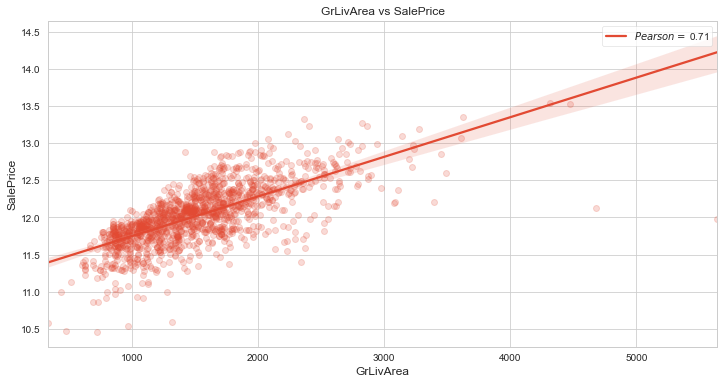

In [24]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.savefig("SalesPrice_GrLivArea.png")
plt.show()


This scatter graph showing the relationship between SalesPrice and GrLivArea(which can be roughly translated to sqftage). We seem to have caught some outliers that will negatively affect the data if we dont remove them now. 

In [25]:
train.iloc[np.where(train.GrLivArea > 4000)]

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
691,691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1182,1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
1298,1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


# Deleting Outliers 

In [26]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

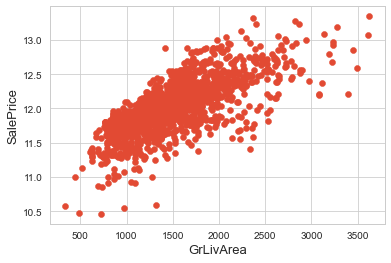

In [27]:
#Using a scattergraph to check again for outliers, as we can see there are a few but not as bad as previously
fig, ax = plt.subplots()
ax.scatter(x = train.GrLivArea, y= train.SalePrice )
ax.set_xlabel('GrLivArea',fontsize=13)
ax.set_ylabel('SalePrice',fontsize =13)
plt.show()

# Pairplot

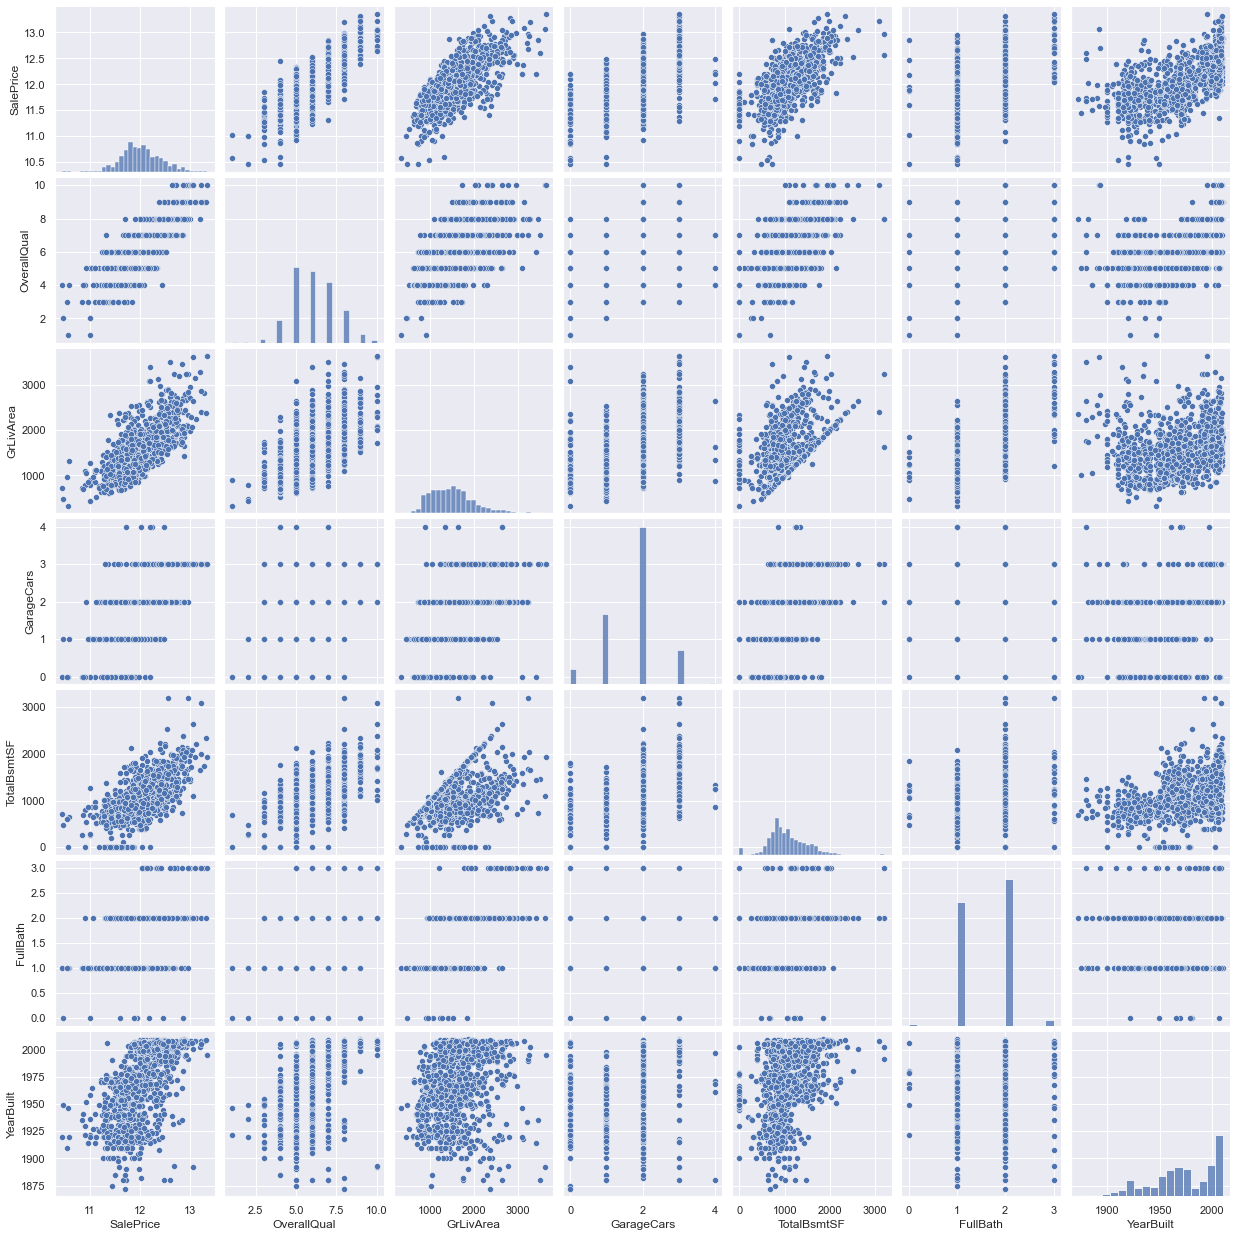

In [28]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.savefig("Pairplot.png")
plt.show()

Using pairplot function to showcase the relationships between variables. 
As we can, most relationships that arent categorical are very linear in nature 

In [29]:
test.to_csv('test_3.csv')

In [30]:
train.to_csv('train_3.csv')